# UDACITY Project: Writing a data science blog post

## Data understanding

[Seattle AirBNB Data](https://www.kaggle.com/airbnb/seattle/data)

As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

The following Airbnb activity is included in this Seattle dataset:

+ Listings, including full descriptions and average review score
+ Reviews, including unique id for each reviewer and detailed comments
+ Calendar, including listing id and the price and availability for that day

## Questions to answer

<h3><span style="color:RoyalBlue">
1. Which words are used most in postive ratings?
</span></h3>

<h3><span style="color:RoyalBlue">
2. Which neighbourhood and which month of the year to choose for economic reasons?
</span></h3>

<h3><span style="color:RoyalBlue">
3. What are better price indicators: neighbourhood or property type and furnishing?
</span></h3>

## Imports

In [1]:
# Imports
import pandas as pd#
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from wordcloud import WordCloud, STOPWORDS

## Data gathering

In [2]:
# Reading csv files
df_cal = pd.read_csv('calendar.csv')
df_list = pd.read_csv('listings.csv')
df_rev = pd.read_csv('reviews.csv')

## Data assessment

In [3]:
# Getting shape of DataFrames
print(f"Shape of calendar DataFrame: {df_cal.shape}")
print(f"Shape of listings DataFrame: {df_list.shape}")
print(f"Shape of reviews DataFrame: {df_rev.shape}")

Shape of calendar DataFrame: (1393570, 4)
Shape of listings DataFrame: (3818, 92)
Shape of reviews DataFrame: (84849, 6)


In [4]:
df_cal.columns[df_cal.isnull().sum() != 0]

Index(['price'], dtype='object')

In [5]:
# Getting percentage of missing values for columns with at least one missing value
print("Missing values\n")
for col in df_cal.columns[df_cal.isnull().sum() != 0]:
    print(f"Calendar data -{col}: {df_cal[col].isnull().sum()} [{df_cal[col].isnull().mean()*100}%]")
for col in df_list.columns[df_list.isnull().sum() != 0]:
    print(f"Listings data - {col}: {df_list[col].isnull().sum()} [{df_list[col].isnull().mean()*100}%]")
for col in df_rev.columns[df_rev.isnull().sum() != 0]:
    print(f"Reviews data - {col}: {df_rev[col].isnull().sum()} [{df_rev[col].isnull().mean()*100}%]")

Missing values

Calendar data -price: 459028 [32.938998399793334%]
Listings data - summary: 177 [4.6359350445259295%]
Listings data - space: 569 [14.903090623363017%]
Listings data - neighborhood_overview: 1032 [27.029858564693555%]
Listings data - notes: 1606 [42.063907805133574%]
Listings data - transit: 934 [24.463069669984286%]
Listings data - thumbnail_url: 320 [8.381351492928236%]
Listings data - medium_url: 320 [8.381351492928236%]
Listings data - xl_picture_url: 320 [8.381351492928236%]
Listings data - host_name: 2 [0.05238344683080147%]
Listings data - host_since: 2 [0.05238344683080147%]
Listings data - host_location: 8 [0.20953378732320588%]
Listings data - host_about: 859 [22.49869041382923%]
Listings data - host_response_time: 523 [13.698271346254584%]
Listings data - host_response_rate: 523 [13.698271346254584%]
Listings data - host_acceptance_rate: 773 [20.24620220010477%]
Listings data - host_is_superhost: 2 [0.05238344683080147%]
Listings data - host_thumbnail_url: 2 [

In [6]:
# Getting preview of calendar data
df_cal.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [7]:
# Getting preview of property listing data
df_list.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [8]:
# Getting preview of review data
df_rev.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


## Data preparation

### Preparing calendar data

In [9]:
# Renaming columns
df_cal.rename(columns={'price': 'price_in_us_dollar'}, inplace=True)
df_cal.available.replace('t', 'True', inplace=True)
df_cal.available.replace('f', 'False', inplace=True)

# Converting data types
df_cal.date = pd.to_datetime(df_cal.date)
df_cal.price_in_us_dollar = df_cal.price_in_us_dollar.replace('[\$,]', '', regex=True).astype(float)

In [10]:
# Getting preview of DataFrame
df_cal.head(2)

,listing_id,date,available,price_in_us_dollar
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0


### Preparing listings data

In [11]:
df_list = pd.read_csv('listings.csv')

In [12]:
# Converting data types
df_list.price = df_list.price.replace('[\$,]', '', regex=True).astype(float)

# Creating copy of DataFrame for later analysis and shortening names for visualizations
df_list_aly = df_list.copy()
df_list_aly.neighbourhood_group_cleansed = df_list_aly.neighbourhood_group_cleansed.replace('Other neighborhoods','Others')
df_list_aly.neighbourhood_group_cleansed = df_list_aly.neighbourhood_group_cleansed.replace('University District','Univ. Dist.')

# Selecting columns to be analyzed as indicators for price
df_list = df_list[['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                   'beds', 'bed_type', 'price']]

# Filling NaN values of numeric columns with the mean
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    df_list[col].fillna((df_list[col].mean()), inplace=True)

# Converting categorical variables into dummy/indicator variables
cat_cols = df_list.select_dtypes(include=['object']).copy().columns
for col in cat_cols:
    # for each categorical value add dummy column, drop original column
    df_list = pd.concat([df_list.drop(col, axis=1),
                         pd.get_dummies(df_list[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [13]:
# Getting preview of DataFrame
df_list.head(2)

,accommodates,bathrooms,bedrooms,beds,price,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,4,1.0,1.0,1.0,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,1.0,1.0,1.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Preparing review data

In [14]:
# Converting data types
df_rev.date = pd.to_datetime(df_rev.date)

In [15]:
# Getting preview of DataFrame
df_rev.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


## Modeling and Visualization

<h3><span style="color:RoyalBlue">
1. Which words are used most in postive ratings?
</span></h3>

In [16]:
# Creating a list of property IDs, that have an average raking of 100
list_good_ratings = df_list_aly[df_list_aly.review_scores_rating==100].id.unique().tolist()

# Selecting only reviews with average rating of 100 and only from 2014 and following years
comments_good = df_rev[(df_rev.date.dt.year >= 2014) & (df_rev.listing_id.isin(list_good_ratings))].comments

# Concatenating strings of comments
text_good = comments_good.str.cat()

In [17]:
# Defining words that are not relevant for evaluation but appear often
not_relevant_words = "and apartment place house stay Seattle home room one u us"

# Creating a list of not relevant words
list_not_relevant = not_relevant_words.split()

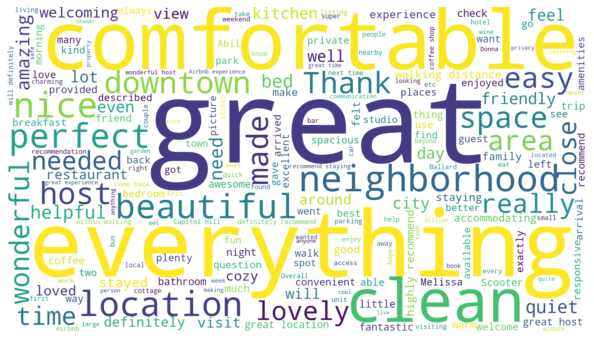

In [18]:
# Updating words, that should not appear in wordcloud
STOPWORDS.update(list_not_relevant)

# Generating word cloud of text
wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(text_good)

# Plotting word cloud
plt.figure(figsize=(12,6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

# Saving plot as png-file
plt.savefig('wordcloud_good_rating.png', dpi=300)

<h3><span style="color:RoyalBlue">
Besides "everything" was "great" the two most used words in the comments at homestays in properties with an average rating of 100 were "clean" and "comfortable".
</span></h3>

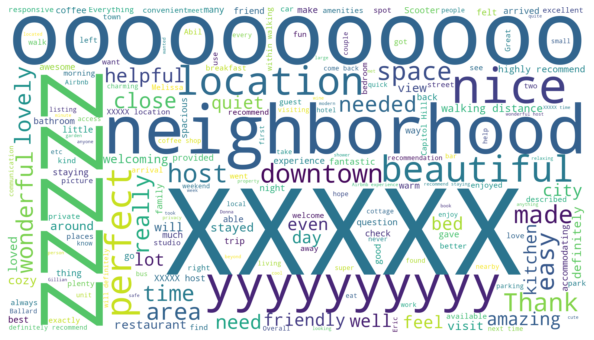

In [19]:
# Changing text for blogpost image
text_good = text_good.replace("great", "XXXXX")
text_good = text_good.replace("everything", "yyyyyyyyyy")
text_good = text_good.replace("clean", "ZZZZZ")
text_good = text_good.replace("comfortable", "ooooooooooo")

# Updating words, that should not appear in wordcloud
STOPWORDS.update(list_not_relevant)

# Generating word cloud of text
wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(text_good)

# Plotting word cloud
plt.figure(figsize=(12,6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

# Saving plot as png-file
plt.savefig('wordcloud_blurred.png', dpi=300)

<h3><span style="color:RoyalBlue">
2. Which neighbourhood and which month of the year to choose for economic reasons?
</span></h3>

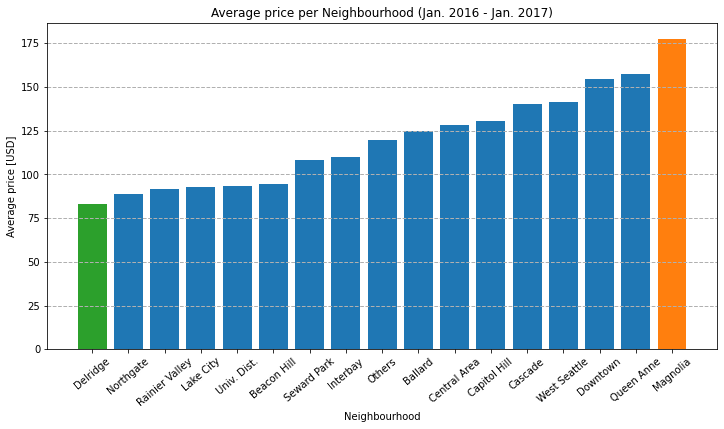

In [20]:
# Selecting data to plot: average price of each neighbourhood group
data_plt = df_list_aly.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values()

# Defining colors of bar chart
colors = ['tab:green' if (x == min(data_plt)) else 'tab:orange' if (x == max(data_plt)) else 'tab:blue' for x in data_plt]

# Plotting data
plt.figure(figsize=(12,6))
plt.bar(data_plt.index, data_plt, color=colors)
plt.title('Average price per Neighbourhood (Jan. 2016 - Jan. 2017)')
plt.xlabel('Neighbourhood')
plt.ylabel('Average price [USD]')
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', linewidth=1)

# Saving plot as png-file
plt.savefig('price_per_neighbourhood.png', dpi=300)

<h3><span style="color:RoyalBlue">
Delrigde is the neighbourhood with lowest average prices and seems to be a good choice for a stay in Seattle in a financial aspect. On average stays are almost 100 USD cheaper than in the most expensive neighbourhood Magnolia. 
</span></h3>

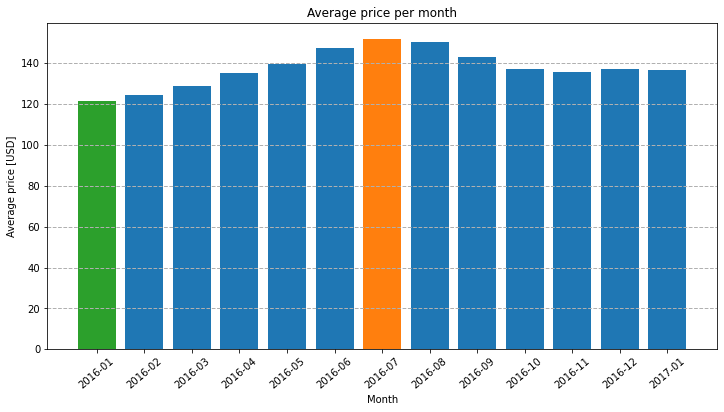

In [21]:
# Selecting data to plot: average price of each month
data_plt = df_cal.groupby(df_cal.date.astype('str').str[0:7])['price_in_us_dollar'].mean()

# Defining colors of bar chart
colors = ['tab:green' if (x == min(data_plt)) else 'tab:orange' if (x == max(data_plt)) else 'tab:blue' for x in data_plt]

# Plotting data
plt.figure(figsize=(12,6)) 
plt.bar(data_plt.index, data_plt, color=colors)
plt.title('Average price per month')
plt.xlabel('Month')
plt.ylabel('Average price [USD]')
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', linewidth=1)

# Saving plot as png-file
plt.savefig('price_per_month.png', dpi=300)

<h3><span style="color:RoyalBlue">
There is an obvious tendency of higher prices in the summer months. July seems to be the most expensive month for visting Seattle. If you try not to spend too much money visiting Seattle and you do not mind the cold, you should prefer winter months, for example January.
</span></h3>

<h3><span style="color:RoyalBlue">
3. What are better price indicators: neighbourhood or property type and furnishing?
</span></h3>

In [22]:
# Defining explanatory columns
X = df_list.drop('price', axis=1)

# Defining response column
y = df_list['price']

In [23]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Instantiating model
lm_model = LinearRegression(normalize=True)

# Fitting model
lm_model.fit(X_train, y_train)

# Predicting
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Scoring
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

# Printing training and testing score
print("The rsquared on the training data was {}.\nThe rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5612741449072042.
The rsquared on the test data was 0.587056152012218.


### Model has acceptable R squared values both for training and test data. Of course it still can be improved a lot.

In [24]:
# Defining the function to get coefficients of the linear model
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['variable'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# Using the function
coef_df = coef_weights(lm_model.coef_, X_train)

# Previewing the top results
coef_df.head(10).style.bar(subset=['coefs', 'abs_coefs'], align='mid', color=['#d65f5f', '#5fba7d'])

,variable,coefs,abs_coefs
21,property_type_Boat,151.257702,151.257702
24,property_type_Camper/RV,70.023434,70.023434
36,room_type_Shared room,-66.304852,66.304852
27,property_type_Dorm,-65.555827,65.555827
9,neighbourhood_group_cleansed_Downtown,41.746522,41.746522
33,property_type_Treehouse,38.176721,38.176721
12,neighbourhood_group_cleansed_Magnolia,34.458912,34.458912
35,room_type_Private room,-34.235027,34.235027
6,neighbourhood_group_cleansed_Cascade,33.399573,33.399573
2,bedrooms,31.384343,31.384343


In [26]:
# Selecting and sorting data: coefficients of top 5 indicators
data_plt = coef_df[['variable', 'abs_coefs']].head(5)
data_plt.sort_values(by='abs_coefs', inplace=True)

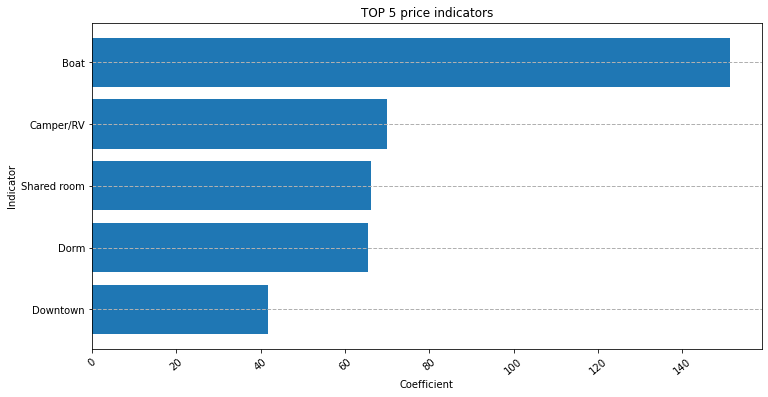

In [27]:
# Plotting data
plt.figure(figsize=(12,6)) 
plt.barh(["Downtown", "Dorm", "Shared room", "Camper/RV", "Boat"], data_plt.abs_coefs, color='tab:blue')
plt.title('TOP 5 price indicators')
plt.xlabel('Coefficient')
plt.ylabel('Indicator')
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', linewidth=1)

# Saving plot as png-file
plt.savefig('top5_indicators.png', dpi=300)

<h3><span style="color:RoyalBlue">
Four of the top five inidcators are property/room type variables and only one is a neighbourhood variable. So it seems that property type and furnishing is more relevant for predicting prices than neighbourhood.
</span></h3>